# Classificação

A classificação baseada em vizinhos é um tipo de aprendizagem baseada em instância ou aprendizagem não generalizante: ela não tenta construir um modelo interno geral, mas simplesmente armazena instâncias dos dados de treinamento. A classificação é calculada a partir de uma votação de maioria simples dos vizinhos mais próximos de cada ponto: um ponto de consulta é atribuído à classe de dados que tem mais representantes nos vizinhos mais próximos do ponto.

*Neste exercício usaremos a biblioteca scikit-learn*

## Vertebrate Dataset
Cada vertebrado é classificado em uma das 5 categorias: mamíferos, répteis, aves, peixes e anfíbios, com base em um conjunto de atributos explicativos (variáveis preditoras). Exceto por "nome", o restante dos atributos foram convertidos em uma representação binária * one hot encoding *. 

#### Carregue os dados em um objeto Pandas DataFrame e exiba seu conteúdo.

In [240]:
import pandas as pd

In [241]:
DataFrame= pd.read_csv('vertebrate.csv')

In [242]:
DataFrame

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


#### Dado o número limitado de exemplos de treinamento, suponha que convertamos o problema em uma tarefa de classificação binária (mamíferos versus não mamíferos). Podemos fazer isso substituindo os rótulos de classe das instâncias por *não mamíferos*, exceto aqueles que pertencem à classe de *mamíferos*. Faça isso na célula abaixo.

In [243]:
DataFrame['Class'].replace(list(DataFrame['Class'].loc[DataFrame['Class'] != 'mammals']),'not-mammals',inplace = True) 
DataFrame['Class']

0         mammals
1     not-mammals
2     not-mammals
3         mammals
4     not-mammals
5     not-mammals
6         mammals
7     not-mammals
8         mammals
9     not-mammals
10    not-mammals
11    not-mammals
12        mammals
13    not-mammals
14    not-mammals
Name: Class, dtype: object

In [244]:
#Ao tentar aplicar o fit deu erro pois os valores nao são inteiros entao terei que converter antes de aplicar 
# o método fit, primeiro irei passar de objeto para inteiro
DataFrame.dtypes

Name                object
Warm-blooded         int64
Gives Birth          int64
Aquatic Creature     int64
Aerial Creature      int64
Has Legs             int64
Hibernates           int64
Class               object
dtype: object

In [245]:
DataFrame['Class'] = pd.Categorical(DataFrame['Class']).codes

In [246]:
DataFrame['Name'] = pd.Categorical(DataFrame['Name']).codes

In [247]:
DataFrame.dtypes

Name                 int8
Warm-blooded        int64
Gives Birth         int64
Aquatic Creature    int64
Aerial Creature     int64
Has Legs            int64
Hibernates          int64
Class                int8
dtype: object

#### Utilize o método sklearn.model_selection.train_test_split para dividir o dataset em 70% dos dados para treino e 30% para teste.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [248]:
import numpy as np
from sklearn.model_selection import train_test_split

In [249]:
x = DataFrame.iloc[:,:-1]
y = DataFrame.iloc[:,7]

In [250]:
x

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
0,4,1,1,0,0,1,0
1,10,0,0,0,0,0,1
2,12,0,0,1,0,0,0
3,14,1,1,1,0,0,0
4,3,0,0,1,0,1,1
5,5,0,0,0,0,1,0
6,0,1,1,0,1,1,1
7,8,1,0,0,1,1,0
8,1,1,1,0,0,1,0
9,6,0,1,1,0,0,0


In [251]:
y

0     0
1     1
2     1
3     0
4     1
5     1
6     0
7     1
8     0
9     1
10    1
11    1
12    0
13    1
14    1
Name: Class, dtype: int8

In [252]:
x_treino, x_teste, y_treino, y_test = train_test_split(x, y,test_size= 0.30, random_state = 42)

A biblioteca *scikit-learn* implementa dois classificadores de vizinhos mais próximos diferentes: **KNeighborsClassifier** implementa o aprendizado com base nos vizinhos mais próximos de cada ponto de consulta, onde é um valor inteiro especificado pelo usuário. **RadiusNeighborsClassifier** implementa o aprendizado com base no número de vizinhos dentro de um raio fixo de cada ponto de treinamento, onde é um valor de ponto flutuante especificado pelo usuário.

#### Crie três classificadores  KNeighborsClassifier com os valores de  k = [5,10,15]

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [253]:
from sklearn.neighbors import KNeighborsClassifier

#### O códgo a seguir cria um classicador KNN com k = 5 e métrica minkowski de p igual a 2 (Observe os parâmetros). Faça o mesmo para os outros valores de k

In [254]:
class5 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

In [255]:
class10 = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2)

In [256]:
class15 = KNeighborsClassifier(n_neighbors=15, metric='minkowski', p=2)

#### Para treinar os classificadores utilize o método fit passando o dataset de treino

In [257]:
class5.fit(x_treino, y_treino)

KNeighborsClassifier()

In [258]:
class10.fit(x_treino, y_treino)

KNeighborsClassifier(n_neighbors=10)

In [259]:
class15.fit(x_treino, y_treino)

KNeighborsClassifier(n_neighbors=15)

#### Utilize o método predict para calcular os valores preditos para o dataset de teste de cada classificador

In [260]:
y_pred5=class5.predict(x_teste)

In [261]:
y_pred10=class10.predict(x_teste)

In [262]:
# erro ja esperado pois o numero foi maior do que era possível
y_pre15=class15.predict(x_teste)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 10, n_neighbors = 15

#### O módulo cálcula diversas métricas de avaliação. Utilize os valores preditos para o dataset de teste e calcule a matriz de confusão e as métricas dadas pelo classification_report. Observe o resultado do classification_report. Qual foi o melhor valor de k?
https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

In [284]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pylab as pl

### Y_Pred 5

In [289]:
names = ['Class 0','Class 1']
print(classification_report(y_test, y_pred5, target_names=names))

              precision    recall  f1-score   support

     Class 0       0.50      1.00      0.67         1
     Class 1       1.00      0.75      0.86         4

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5



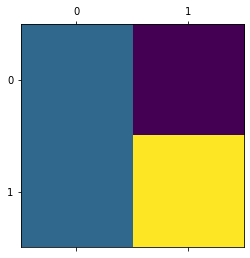

In [264]:
cm_5=confusion_matrix(y_test,y_pred5)
pl.matshow(cm_5)

### Y_Pre 10

In [290]:
print(classification_report(y_test, y_pred10, target_names=names))

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00         1
     Class 1       0.80      1.00      0.89         4

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



/home/anny/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


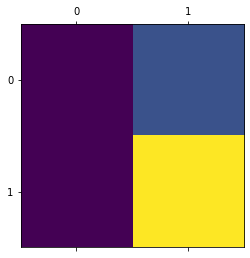

In [265]:
cm_10=confusion_matrix(y_test,y_pred10)
pl.matshow(cm_10)

### Escolha uma outra distância e repita o mesmo procedimento para a nova distância. 
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric

### Escolhi a Distância Euclidiana



In [270]:
#O códgo a seguir cria um classicador KNN com os trÊs valores 5,10 e 15
class5_ = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [271]:
class10_ = KNeighborsClassifier(n_neighbors=10, metric='euclidean')

In [272]:
class15_ = KNeighborsClassifier(n_neighbors=15, metric='euclidean')

In [273]:
#Para treinar os classificadores utilize o método fit passando o dataset de treino
class5_.fit(x_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [274]:
class10_.fit(x_treino, y_treino)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [275]:
class15_.fit(x_treino, y_treino)

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

In [276]:
#Utilize o método predict para calcular os valores preditos
y_pred5_=class5_.predict(x_teste)

In [277]:
y_pred10_=class10_.predict(x_teste)

In [279]:
# erro ja esperado pois o numero foi maior do que era possível
y_pred15_=class15_.predict(x_teste)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 10, n_neighbors = 15

### Y_Pred 5

In [291]:
print(classification_report(y_test, y_pred5_, target_names=names))

              precision    recall  f1-score   support

     Class 0       0.50      1.00      0.67         1
     Class 1       1.00      0.75      0.86         4

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5



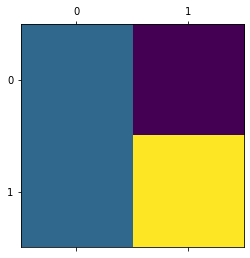

In [281]:
#O módulo cálcula diversas métricas de avaliação. Utilize os valores preditos para o dataset de teste e calcule a matriz de confusão e as métricas dadas pelo classification_report.
cm_5_=confusion_matrix(y_test,y_pred5_)
pl.matshow(cm_5)

### Y_Pred 10

In [292]:
print(classification_report(y_test, y_pred10, target_names=names))

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00         1
     Class 1       0.80      1.00      0.89         4

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



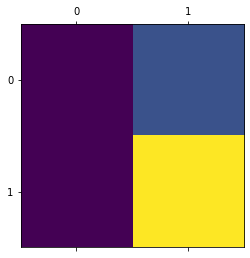

In [282]:
cm_5=confusion_matrix(y_test,y_pred10_)
pl.matshow(cm_5)